# Análisis del orden de las permutaciones cuyo tamaño  sea múltiplo de dos

## Cálculo del orden comparando matrices

### Código

In [16]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, gcd


TYPE_DATA = np.int32
TAM_DATA = TYPE_DATA().dtype.itemsize
SIZE_MAX = 12

res = []

for SIZE in 2 ** np.arange(SIZE_MAX):
    data = np.arange(SIZE*TAM_DATA)
    data_out = np.empty([SIZE*TAM_DATA])
    data_orig = data
    perm = []
    for i in range(SIZE*TAM_DATA):
        perm.append(set())

    while np.array_equal(data_orig, data_out) is False:
            chunk = data
            chunk_out = np.empty(SIZE*TAM_DATA)      

            for k in range(TAM_DATA):
                chunk_out[SIZE * k:SIZE * (k+1):] = chunk[k::TAM_DATA]

            for i in range(SIZE*TAM_DATA):
                perm[i].add(chunk_out[i])

            data_out = chunk_out
            data = data_out

    s = set()
    for i, elem in enumerate(perm):
        s.add(tuple(sorted(tuple(elem))))
    perm = sorted(list(s))

    perm_l = []
    for elem in perm:
        perm_l.append(len(elem))

    lcm = perm_l[0]
    for elem in perm_l[1:]:
        lcm = lcm * elem // gcd(lcm, elem)

    res.append(lcm)

### Representación de los resultados

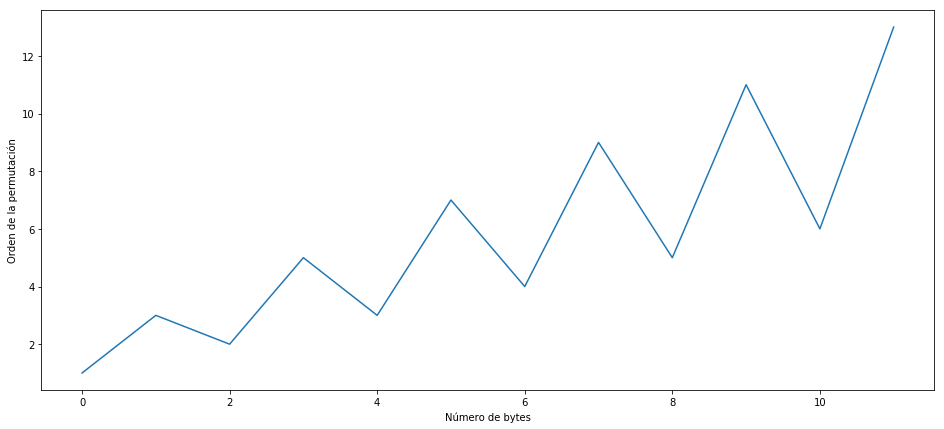

In [20]:
fig = plt.figure(figsize=(16,7))

Y = res
X = np.arange(0, SIZE_MAX)

plt.plot(X, Y)

plt.xlabel("Número de bytes")
plt.ylabel("Orden de la permutación")
plt.show()

### Conclusiones

Se puede observar que sí que parece que el orden de la permutación esté relacionada con la longitud de la permutación.

Cabe destacar que, si el número de elementos es muy elevado, falla la comparación de matrices y el resultado no es correcto.

¿Se puede obtener una regla para obtener el orden y, así, evitar tener que comparar las matrices?

## Cálculo del orden usando una ecuación

### Código y representación de los resultados

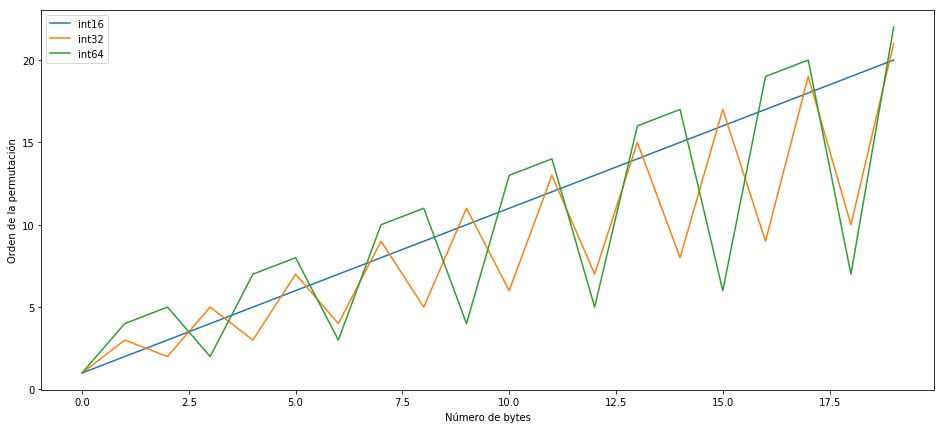

In [21]:
% matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt, log

fig = plt.figure(figsize=(16,7))

for TYPE_DATA in {np.int16, np.int32, np.int64}:
    
    TAM_DATA = TYPE_DATA().dtype.itemsize
    
    X = np.arange(20)
    Y = []

    for SIZE in 2 ** X:
        
        if  log(SIZE, TAM_DATA) - int(log(SIZE, TAM_DATA)) < 0.001:
            orden = log(SIZE, TAM_DATA) + 1
        
        else:
            orden = log(SIZE, 2) + log(TAM_DATA, 2)
        
        Y.append(orden)
    
    plt.plot(X, Y, label = "int" + str(TAM_DATA*8))

plt.xlabel("Número de bytes")
plt.ylabel("Orden de la permutación")

plt.legend(loc = "upper left")
plt.show()

### Conclusiones

Se ha definido una ecuación que a partir del número de datos y del tamaño en bytes de estos datos permite calcular el órden de las permutaciones generadas. Esta ecuación es menos costosa que tener que hacer la comparación de las matrices de los datos explicada anteriormente.

Este resultado se puede aplicar de muchas formas al shuffle iterativo. Por ejemplo, a la hora de descomprimir unos datos, si sabemos que el orden de la permutación es 35 y el ratio óptimo se ha obtenido en la iteración 30, será mejor hacer 5 iteraciones más para volver al estado inicial que no tener que deshacer 30 veces la permutación.